In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import entropy
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import sys
%matplotlib inline
import ruptures as rpt
from ruptures.base import BaseCost
import matplotlib.patches as patches

In [2]:
plt.style.use('seaborn-poster')


# Beware!!! Window shifted for drawing purposes
def approximation_mean(time_series, window, threshold=None, mode = 0):
#     time_series = n p.array(time_series)
    if window%2 != 0:
        window += 1
    result = [np.nan]
    norm = sum((time_series[0:window] - np.mean(time_series[0:window]))**2)
    for i in range(len(time_series) - window + 1):
        all_ts = time_series[i:i+window]
        left_ts = time_series[i:int(i+window/2)]
        right_ts = time_series[int(i+window/2):i+window]
        
        all_ts_cost = sum((all_ts - np.mean(all_ts))**2)
        left_ts_cost = sum((left_ts - np.mean(left_ts))**2)
        right_ts_cost = sum((right_ts - np.mean(right_ts))**2)
        
        result.append((all_ts_cost - left_ts_cost - right_ts_cost)/norm)
        
        if mode == 1:
            if max(result) >= threshold:
                break
        
    return(result)

# Beware!!! Window shifted for drawing purposes
def prediction_mean(time_series, window):
    if window%2 != 0:
        window += 1
    result = [np.nan]*int(window/2+13)
    norm = sum(time_series[0:int(window/2)]*time_series[0:int(window/2)])
    for i in range(len(time_series) - window + 1):
        left_ts = time_series[i:int(i+window/2)]
        right_ts = time_series[int(i+window/2):i+window]
        left_ts_cost = sum((right_ts - np.mean(left_ts))**2)/norm
        result.append(left_ts_cost)
#     print(len(result[:-13]))
    return(result[:-13])


# Beware!!! Window shifted for drawing purposes
def prediction_mean_2(time_series, window):
    if window%2 != 0:
        window += 1
    result = [np.nan]*int(window/2+52)
    norm = sum(time_series[0:int(window/2)]*time_series[0:int(window/2)])
    for i in range(len(time_series) - window + 1):
        left_ts = time_series[i:int(i+window/2)]
        right_ts = time_series[int(i+window/2):i+window]
        left_ts_cost = sum((right_ts - np.mean(left_ts))**2)/norm
        result.append(left_ts_cost)
#     print(len(result[:-13]))
    return(result[:-52])

In [3]:
np.random.seed(10)
signal = np.cos(2*np.pi/24 * np.arange(0, 400) + (np.pi/2))
noise = np.random.normal(0,0.1,400)
signal[200:] = signal[200:]+1
signal = signal+noise

In [4]:
?plt.legend

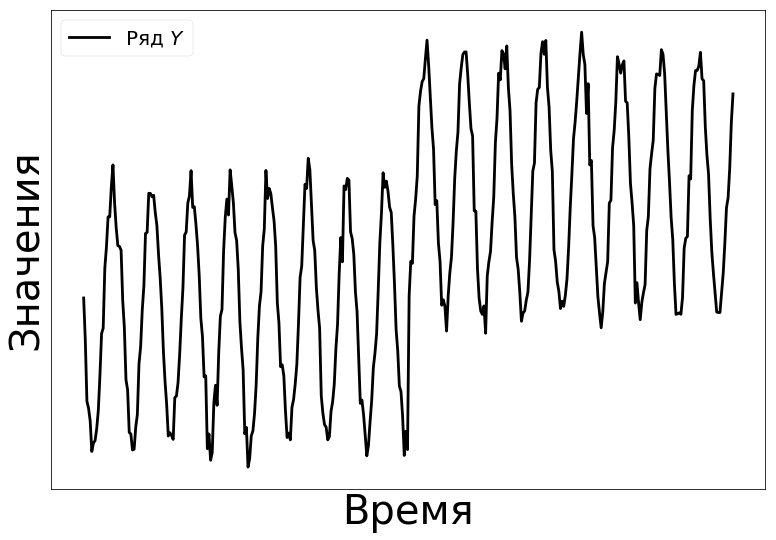

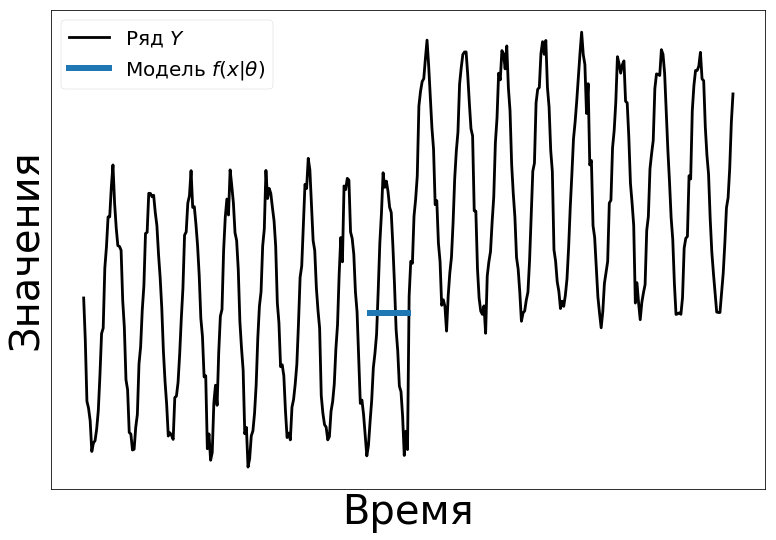

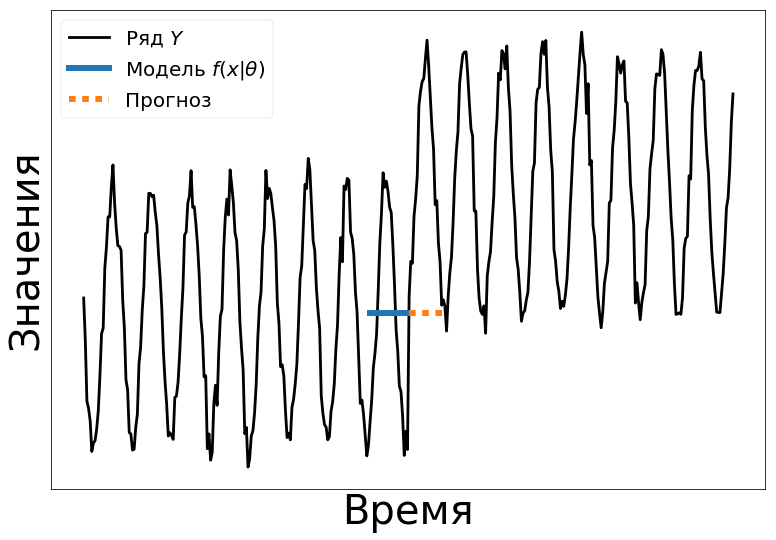

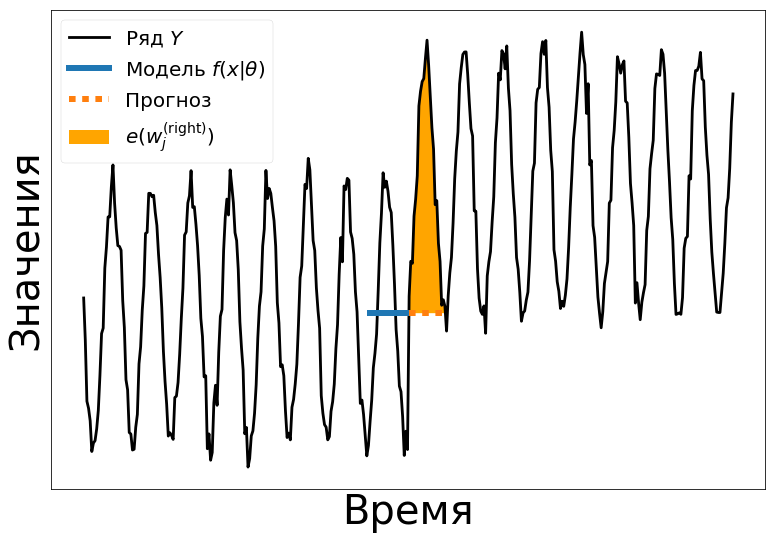

In [4]:
plt.plot(signal,color='black')
plt.legend([r'Ряд $Y$'], loc = 2, fancybox = True, prop={'size': 20})
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.savefig('./fig/approaches_first_1_ru.png')
plt.show()

plt.plot(signal,color='black')
plt.plot(range(176,200),[np.mean(signal[176:200])]*24, linewidth=6)
plt.legend([r'Ряд $Y$', r'Модель $f(x|\theta)$'], loc = 2, fancybox = True, prop={'size': 20})
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.savefig('./fig/approaches_first_2_ru.png')
plt.show()

plt.plot(signal,color='black')
plt.plot(range(176,200),[np.mean(signal[176:200])]*24, linewidth=6)
plt.plot(range(200,224), [np.mean(signal[176:200])]*24, linewidth=6, ls=':')
plt.legend([r'Ряд $Y$', r'Модель $f(x|\theta)$', 'Прогноз'], loc = 2, fancybox = True, prop={'size': 20})
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.savefig('./fig/approaches_first_3_ru.png')
plt.show()

plt.plot(signal,color='black')
plt.plot(range(176,200),[np.mean(signal[176:200])]*24, linewidth=6)
plt.plot(range(200,224), [np.mean(signal[176:200])]*24, linewidth=6, ls=':')
plt.fill_between(range(200,224), [np.mean(signal[176:200])]*24, signal[200:224],facecolor='orange')
plt.legend([r'Ряд $Y$', r'Модель $f(x|\theta)$', 'Прогноз', r'$e(w_j^{\mathrm{(right)}})$'], loc = 2, fancybox = True, prop={'size': 20})
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.savefig('./fig/approaches_first_4_ru.png')
plt.show()

In [21]:
# fig = plt.figure(dpi=80)
# ax = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])
# ax_2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
# rect = patches.Rectangle((50, -1.2), width=25, height=2.5, color='blue',alpha=0.3)
# rect_2 = patches.Rectangle((75, -1.2), width=25, height=2.5, color='orange',alpha=0.3)
# rect_3 = patches.Rectangle((175, -1.2), width=25, height=2.5, color='blue',alpha=0.3)
# rect_4 = patches.Rectangle((200, -1.2), width=25, height=2.5, color='orange',alpha=0.3)
# ax.add_patch(rect)
# ax.add_patch(rect_2)
# ax.add_patch(rect_3)
# ax.add_patch(rect_4)
# ax.get_yaxis().set_ticks([])
# ax.get_xaxis().set_ticks([])
# ax.set_ylabel('Values', fontsize=40)
# ax.grid(True, 'major', axis='x')
# ax.plot(signal,color='black')
# ax.plot(range(50,75),[np.mean(signal[50:75])]*25, linewidth=6, color='blue')
# ax.plot(range(75,100),[np.mean(signal[75:100])]*25, linewidth=6, ls=':', color='orange')
# ax.plot(range(175,200),[np.mean(signal[175:200])]*25, linewidth=6, color='blue')
# ax.plot(range(200,225),[np.mean(signal[175:200])]*25, linewidth=6, ls=':', color='orange')


# cp_signal = prediction_mean(signal, 48)
# ax_2.plot(range(0,377),cp_signal,color='black')
# ax_2.get_yaxis().set_ticks([])
# # ax_2.plot(range(0,377),cp_signal)
# ax_2.get_xaxis().set_ticks([])

# ax_2.set_ylabel('Detection', fontsize=40)
# ax_2.set_xlabel('Time', fontsize=40)



# plt.savefig('ssa-cardiff-seminar/tex/images/approaches_first_5.png')
# plt.show()

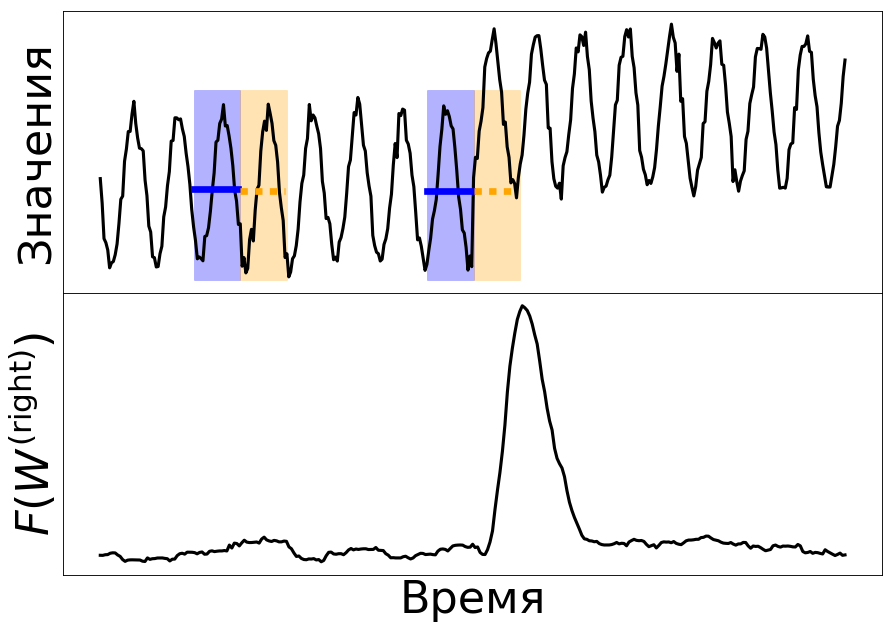

In [5]:
fig = plt.figure(dpi=80)
ax = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])
ax_2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
rect = patches.Rectangle((50, -1.2), width=25, height=2.5, color='blue',alpha=0.3)
rect_2 = patches.Rectangle((75, -1.2), width=25, height=2.5, color='orange',alpha=0.3)
rect_3 = patches.Rectangle((175, -1.2), width=25, height=2.5, color='blue',alpha=0.3)
rect_4 = patches.Rectangle((200, -1.2), width=25, height=2.5, color='orange',alpha=0.3)
ax.add_patch(rect)
ax.add_patch(rect_2)
ax.add_patch(rect_3)
ax.add_patch(rect_4)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
ax.set_ylabel('Значения', fontsize=40)
ax.grid(True, 'major', axis='x')
ax.plot(signal,color='black')
ax.plot(range(50,75),[np.mean(signal[50:75])]*25, linewidth=6, color='blue')
ax.plot(range(75,100),[np.mean(signal[75:100])]*25, linewidth=6, ls=':', color='orange')
ax.plot(range(175,200),[np.mean(signal[175:200])]*25, linewidth=6, color='blue')
ax.plot(range(200,225),[np.mean(signal[175:200])]*25, linewidth=6, ls=':', color='orange')


cp_signal = prediction_mean_2(signal, 48)
ax_2.plot(range(0,377),cp_signal,color='black')
ax_2.get_yaxis().set_ticks([])
# ax_2.plot(range(0,377),cp_signal)
ax_2.get_xaxis().set_ticks([])

ax_2.set_ylabel(r'$F(W^{\mathrm{(right)}})$', fontsize=40)
ax_2.set_xlabel('Время', fontsize=40)



plt.savefig('./fig/approaches_first_6_ru.png')
plt.show()

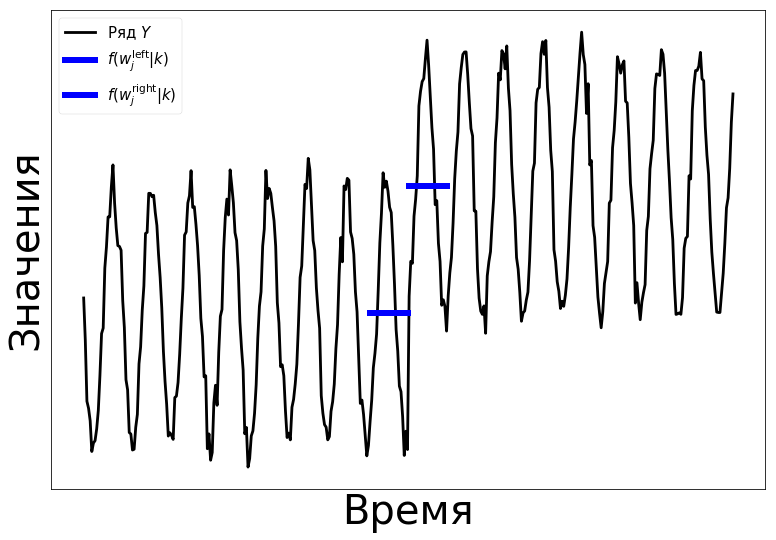

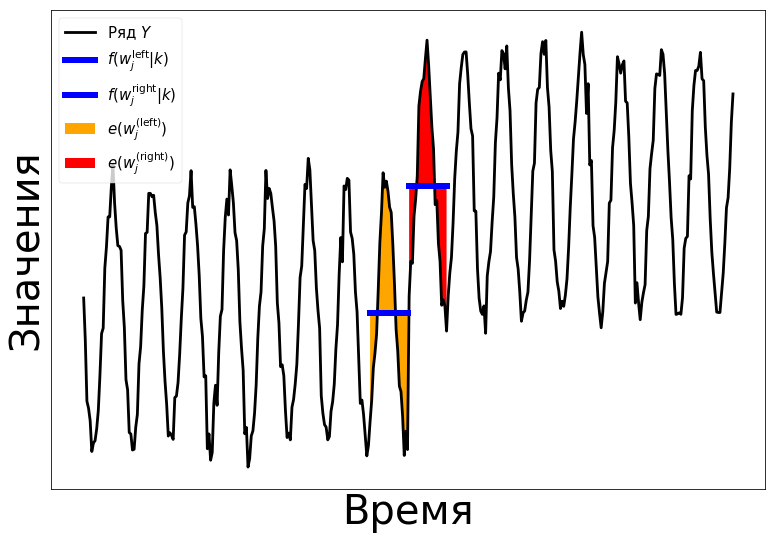

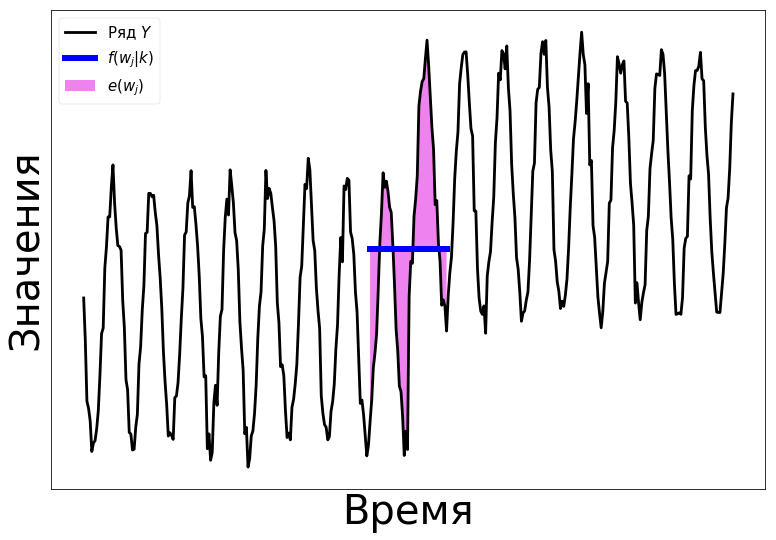

In [6]:
plt.plot(signal,color='black')
plt.plot(range(176,200),[np.mean(signal[176:200])]*24, linewidth=6, color='blue')
plt.plot(range(200,224), [np.mean(signal[200:224])]*24, linewidth=6, color='blue')
plt.legend([r'Ряд $Y$', r'$f(w_j^{\mathrm{left}}|k)$', r'$f(w_j^{\mathrm{right}}|k)$'], loc = 2, fancybox = True, prop={'size': 15})
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.savefig('./fig/approaches_second_1_ru.png')
plt.show()

plt.plot(signal,color='black')
plt.plot(range(176,200),[np.mean(signal[176:200])]*24, linewidth=6, color='blue')
plt.plot(range(200,224), [np.mean(signal[200:224])]*24, linewidth=6, color='blue')
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.fill_between(range(176,200), [np.mean(signal[176:200])]*24, signal[176:200],facecolor='orange')
plt.fill_between(range(200,224), [np.mean(signal[200:224])]*24, signal[200:224],facecolor='red')
plt.legend([r'Ряд $Y$', 
            r'$f(w_j^{\mathrm{left}}|k)$', 
            r'$f(w_j^{\mathrm{right}}|k)$', 
            r'$e(w_j^{\mathrm{(left)}})$',
            r'$e(w_j^{\mathrm{(right)}})$',
           ], loc = 2, fancybox = True, prop={'size': 15})
plt.savefig('./fig/approaches_second_2_ru.png')
plt.show()

plt.plot(signal,color='black')
plt.plot(range(176,224), [np.mean(signal[176:224])]*48, linewidth=6, color='blue')
plt.xlabel('Время', fontsize=40)
plt.ylabel('Значения', fontsize=40)
plt.xticks([])
plt.yticks([])
plt.fill_between(range(176,224), [np.mean(signal[176:224])]*48, signal[176:224],facecolor='violet')
plt.legend([r'Ряд $Y$', r'$f(w_j|k)$', r'$e(w_j)$'], loc = 2, fancybox = True, prop={'size': 15})
# plt.fill_between(range(0,200), [np.mean(signal[0:200])]*200, signal[0:200],facecolor='orange')
# plt.fill_between(range(200,400), [np.mean(signal[200:400])]*200, signal[200:400],facecolor='orange')
plt.savefig('./fig/approaches_second_3_ru.png')
plt.show()

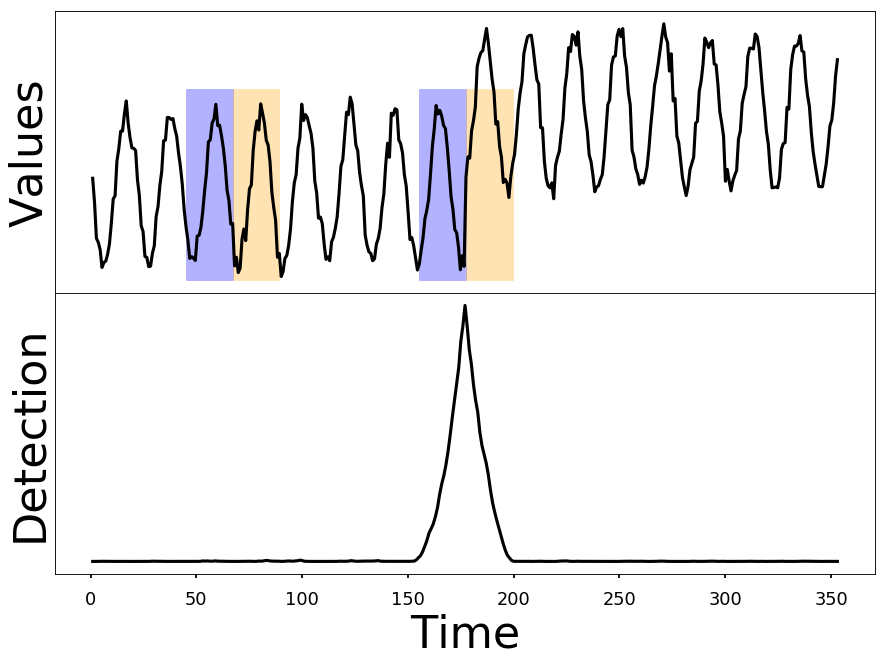

In [7]:
fig = plt.figure(dpi=80)
ax = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[])
ax_2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
rect = patches.Rectangle((50, -1.2), width=25, height=2.5, color='blue',alpha=0.3)
rect_2 = patches.Rectangle((75, -1.2), width=25, height=2.5, color='orange',alpha=0.3)
rect_3 = patches.Rectangle((175, -1.2), width=25, height=2.5, color='blue',alpha=0.3)
rect_4 = patches.Rectangle((200, -1.2), width=25, height=2.5, color='orange',alpha=0.3)
ax.add_patch(rect)
ax.add_patch(rect_2)
ax.add_patch(rect_3)
ax.add_patch(rect_4)
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])
ax.set_ylabel('Values', fontsize=40)
ax.grid(True, 'major', axis='x')
ax.plot(signal,color='black')

cp_signal = approximation_mean(signal, 48)
ax_2.plot(cp_signal,color='black')
ax_2.get_yaxis().set_ticks([])

ax_2.set_ylabel('Detection', fontsize=40)
ax_2.set_xlabel('Time', fontsize=40)

plt.savefig('./fig/approaches_second_4.png')
plt.show()